In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('combined_data_cleaned.csv')

In [3]:
data.head()

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations_per_million,share_doses_used,fips,deaths,new_cases,total_cases,population
0,2020-01-21,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,1,1,7614800
1,2020-01-22,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,1,7614800
2,2020-01-23,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,1,7614800
3,2020-01-24,Illinois,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0,1,1,12672400
4,2020-01-24,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,1,7614800


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26359 entries, 0 to 26358
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 26359 non-null  object 
 1   state                                26359 non-null  object 
 2   total_vaccinations                   9020 non-null   float64
 3   total_distributed                    9020 non-null   float64
 4   people_vaccinated                    9020 non-null   float64
 5   people_fully_vaccinated_per_hundred  9020 non-null   float64
 6   total_vaccinations_per_hundred       9020 non-null   float64
 7   people_fully_vaccinated              9020 non-null   float64
 8   people_vaccinated_per_hundred        9020 non-null   float64
 9   distributed_per_hundred              9020 non-null   float64
 10  daily_vaccinations_raw               9020 non-null   float64
 11  daily_vaccinations_per_milli

In [5]:
data.tail()

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations_per_million,share_doses_used,fips,deaths,new_cases,total_cases,population
26354,2021-06-24,Virginia,9109659.0,10259795.0,4995493.0,50.83,106.73,4338863.0,58.53,120.20,28094.0,3378.0,0.888,51,11378,193,679330,8535700
26355,2021-06-24,Washington,8408738.0,9332975.0,4603331.0,53.32,110.42,4060008.0,60.45,122.56,23697.0,3136.0,0.901,53,5939,565,451560,7614800
26356,2021-06-24,West Virginia,1397783.0,1879415.0,769962.0,36.70,77.99,657655.0,42.96,104.87,3687.0,1966.0,0.744,54,2876,55,163744,1792200
26357,2021-06-24,Wisconsin,5808243.0,6076435.0,3097135.0,48.18,99.76,2805172.0,53.19,104.36,11148.0,1949.0,0.956,55,8092,142,677398,5822500
26358,2021-06-24,Wyoming,415449.0,513455.0,224440.0,33.81,71.78,195677.0,38.78,88.72,93.0,1275.0,0.809,56,740,71,61892,578700


In [6]:
data.date = pd.to_datetime(data.date)

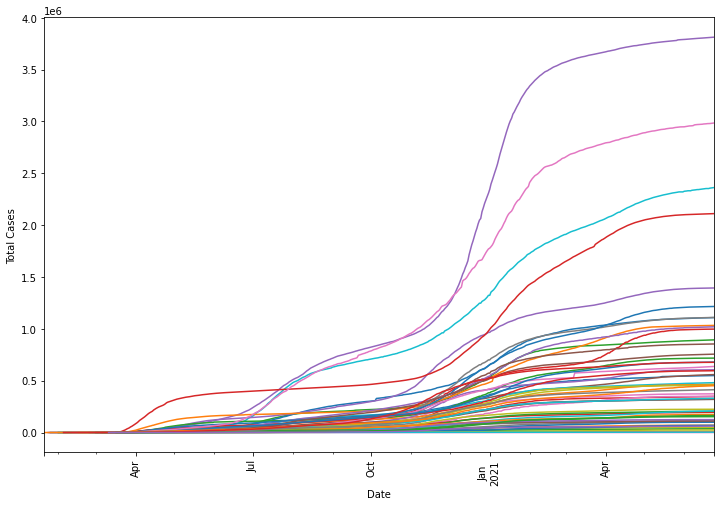

In [7]:
#cumulative cases grouped by state

fig, ax = plt.subplots(figsize=(12,8))
_ = data.groupby('state').plot(x='date', y='total_cases', ax=ax)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total Cases')
_ = plt.xticks(rotation=90)
ax.get_legend().remove()

plt.show()

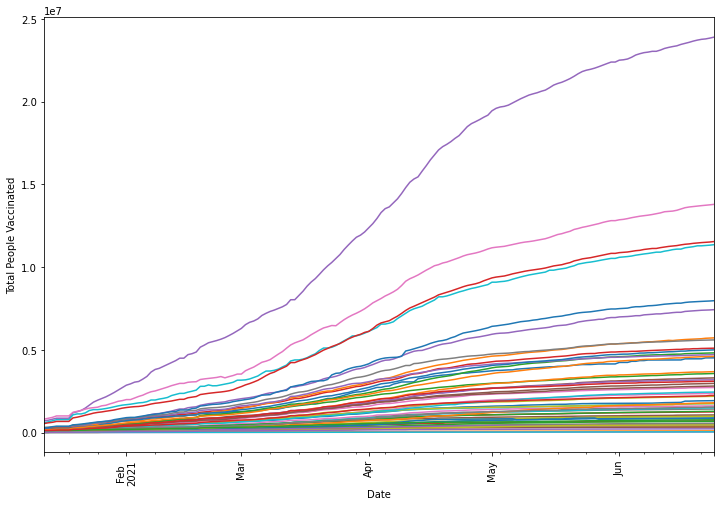

In [8]:
#total people vaccinated grouped by state

fig, ax = plt.subplots(figsize=(12,8))
_ = data.iloc[data.people_vaccinated.first_valid_index():].groupby('state').plot(x='date', y='people_vaccinated', ax=ax)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total People Vaccinated')
_ = plt.xticks(rotation=90)
ax.get_legend().remove()

plt.show()

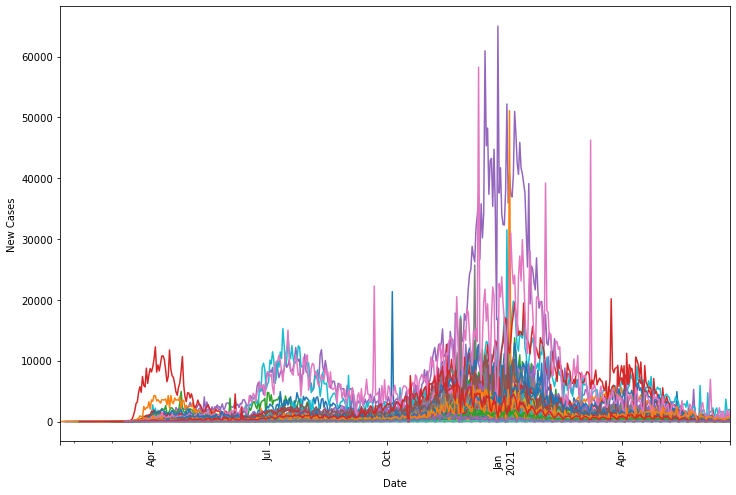

In [9]:
#new cases grouped by state

fig, ax = plt.subplots(figsize=(12,8))
_ = data.groupby('state').plot(x='date', y='new_cases', ax=ax)
_ = plt.xlabel('Date')
_ = plt.ylabel('New Cases')
_ = plt.xticks(rotation=90)
ax.get_legend().remove()

plt.show()

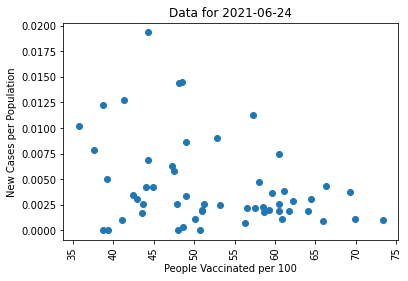

In [10]:
#scatter plot of one day's data

data_one_day = data.loc[data['date'] == '2021-06-24']

_ = plt.scatter(data_one_day['people_vaccinated_per_hundred'], (data_one_day['new_cases'] / data_one_day['population'] * 100))
_ = plt.title('Data for 2021-06-24')
_ = plt.xlabel('People Vaccinated per 100')
_ = plt.ylabel('New Cases per Population')
_ = plt.xticks(rotation=90)

plt.show()

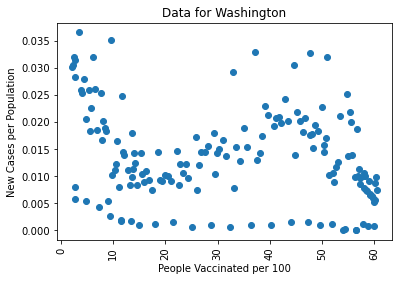

In [11]:
#scatter plot of one state's data [people vaccinated to new cases]

data_one_state = data.loc[data['state'] == 'Washington']

_ = plt.scatter(data_one_state['people_vaccinated_per_hundred'], (data_one_state['new_cases'] / data_one_state['population'] * 100))
_ = plt.title('Data for Washington')
_ = plt.xlabel('People Vaccinated per 100')
_ = plt.ylabel('New Cases per Population')
_ = plt.xticks(rotation=90)

plt.show()

<AxesSubplot:>

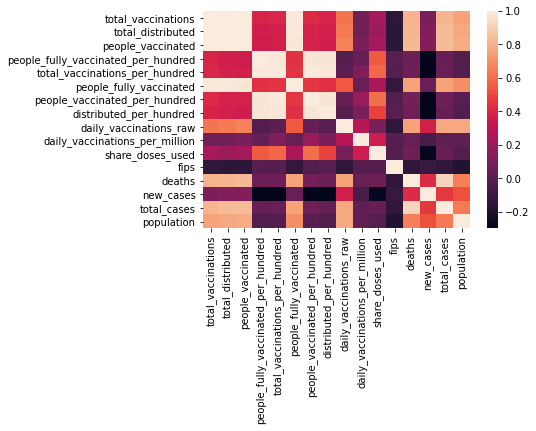

In [12]:
sns.heatmap(data.corr())